# Project 1 (Group 7)

Members: <br>
Feng Leung 300366142 <br>
Karli Li 300350713<br>
Tom Tsang 300363109<br>
King Lok Wan 300360889<br>

# Part A

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# So that the plot will be saved within the jupyter notebook
%matplotlib inline 


# 2. Import dataset

In [2]:
df = pd.read_csv('unclean_data.csv')
print("this dataset has {} columns and {} rows".format(*df.shape))

this dataset has 4006 columns and 11 rows


# 3. Data Cleaning

In [3]:
# 3.1 Handling missing rows
df = df.dropna(axis=0, how="all")
df.reset_index(drop = True, inplace = True)
df.shape

(3907, 11)

In [4]:
# 3.2 Handling the currency symbols and comma format

df.price = df.price.str.replace('£','')
df.price = df.price.str.replace(',','')

In [5]:
#3.3 Handling non-valid column names
df.rename(columns = {'fuel type':'fuel_type', 
                     'fuel type2':'fuel_type2', 
                     'engine size':'engine_size',
                     'engine size2':'engine_size2'}, 
          inplace = True)

In [6]:
# 3.4 Handling missing values in columns: fuel_type

df.fuel_type2.fillna(df.fuel_type, inplace =  True)
df.drop('fuel_type', axis = 1,inplace = True)
df.rename(columns = {'fuel_type2':'fuel_type'}, inplace = True)

In [7]:
# 3.5 Handling missing values and comma format in columns: mileage
df.mileage.fillna(df.mileage2, inplace = True)
df.drop('mileage2', axis = 1, inplace = True)


In [8]:
#3.6 Handling missing values and different value standard in columns: engine_size
df.engine_size2.fillna(df.engine_size, inplace = True)
df.engine_size2 = pd.to_numeric(df['engine_size2'], errors = 'coerce')
y = lambda x: round(x/1000,1) if x>1000 else round(x,1)
df.engine_size2 = df.engine_size2.apply(y)
df.drop('engine_size', axis = 1, inplace = True)
df.rename({'engine_size2':'engine_size'}, axis = 1, inplace = True)


In [9]:
# 3.7 Handling wrong data type: year

df.dropna(inplace = True)
df.year.astype('int64')


0       2020
1       2020
2       2020
3       2019
4       2019
        ... 
3902    2017
3903    2018
3904    2014
3905    2014
3906    2014
Name: year, Length: 3902, dtype: int64

In [10]:
# 3.8 Handling unneeded columns
df.drop(columns = {'model', 'reference'}, inplace = True)

In [11]:
# 3.9 Handling categorical data
tr = df.fuel_type
tr = pd.get_dummies(df.transmission)
tr.rename(columns = {'Other':'Other_Transmission' }, inplace = True)

# Changing fuel_type: Other to fuel_type: Other_Fuel
ft = df.fuel_type
ft = pd.get_dummies(ft)
ft.rename(columns = {'Other':'Other_Fuel' }, inplace = True)


df = df.join(tr)
df = df.join(ft)

df.drop(columns={'transmission', 'fuel_type'}, inplace = True)



In [12]:
df

,year,price,mileage,engine_size,Automatic,Manual,Other_Transmission,Semi-Auto,Diesel,Hybrid,Other_Fuel,Petrol
0,2020.0,30495,"1,200",2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,"1,000",1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,500,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,"5,000",2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,"4,500",2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017.0,14700,"31,357",1.6,0,1,0,0,1,0,0,0
3903,2018.0,18500,"28,248",2.1,1,0,0,0,1,0,0,0
3904,2014.0,11900,"48,055",2.1,0,1,0,0,1,0,0,0
3905,2014.0,11300,"49,865",2.1,1,0,0,0,1,0,0,0


In [13]:
# 3.10 Changing price and mileage to numeric 
df.mileage = df.mileage.apply(lambda x: x.replace(',', ''))
df.price = df.price.apply(lambda x: x.replace(',', ''))


df.mileage = pd.to_numeric(df.mileage, errors = 'coerce')
df.price = pd.to_numeric(df.price, errors = 'coerce')



In [14]:
# 3.11 Final check of NA values and save the cleaned data into csv

print(df.isnull().any(axis=0))
print()
print((df[df.mileage.isna()==True]))

df.dropna(axis = 0, inplace = True)

df.reset_index(drop = True, inplace = True)
print()
print("This dataset has {} columns and {} rows".format(*df.shape))
df.to_csv('cleaned_data.csv')

year                  False
price                 False
mileage                True
engine_size           False
Automatic             False
Manual                False
Other_Transmission    False
Semi-Auto             False
Diesel                False
Hybrid                False
Other_Fuel            False
Petrol                False
dtype: bool

        year  price  mileage  engine_size  Automatic  Manual  \
3790  2020.0  39950      NaN          2.0          1       0   
3822  2020.0  42890      NaN          2.0          1       0   
3823  2020.0  36890      NaN          2.0          1       0   
3843  2020.0  36890      NaN          2.0          1       0   

      Other_Transmission  Semi-Auto  Diesel  Hybrid  Other_Fuel  Petrol  
3790                   0          0       0       1           0       0  
3822                   0          0       0       1           0       0  
3823                   0          0       1       0           0       0  
3843                   0          

# 4. Exploratory Data Analysis and Visualization

### 4.1 Is there any relationship between average age of car and the price?

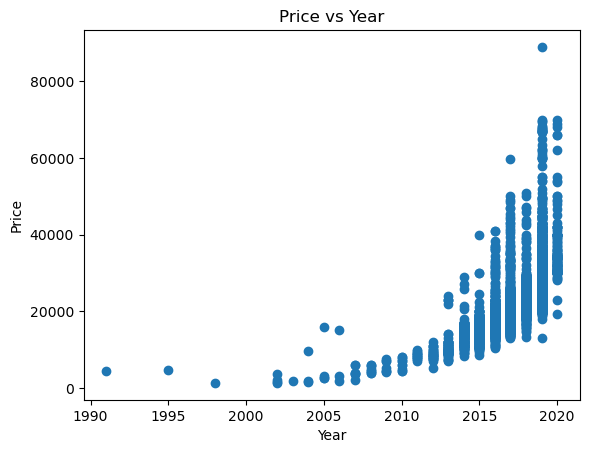

In [15]:
# Relationship between age and price
plt.scatter(df.year, df.price)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price vs Year")

plt.show()

### 4.2 Is there any relationship between engine size of car and the price?

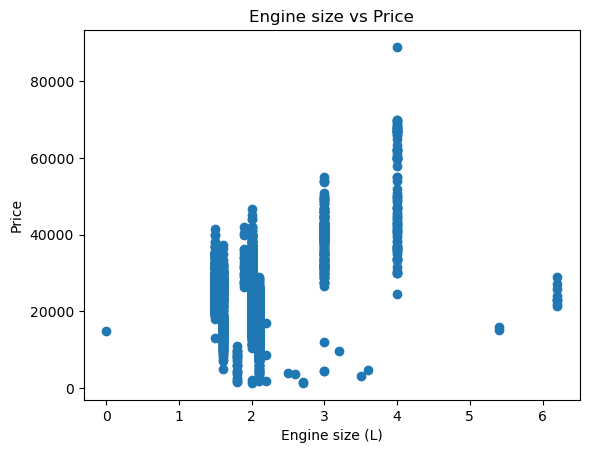

In [16]:
# Relationship between engine size and price
plt.scatter(df.engine_size, df.price)
plt.xlabel("Engine size (L)")
plt.ylabel("Price")
plt.title("Engine size vs Price")

plt.show()

## 4.3 Summary of Statistics and Visualize the data

In [17]:
df1 = df.filter(['year','price'], axis=1)
df1['price_mean'] = df1.groupby('year')['price'].transform('mean')
#df1 = df1.groupby('year')
print(df1)
print()

df2 = df.filter(['year','mileage'], axis=1)
df2['mileage_mean'] = df2.groupby('year')['mileage'].transform('mean')
print(df2)


        year  price    price_mean
0     2020.0  30495  36841.515873
1     2020.0  29989  36841.515873
2     2020.0  37899  36841.515873
3     2019.0  30399  29393.384906
4     2019.0  29899  29393.384906
...      ...    ...           ...
3893  2017.0  14700  21283.431579
3894  2018.0  18500  23916.651934
3895  2014.0  11900  14095.713235
3896  2014.0  11300  14095.713235
3897  2014.0  14800  14095.713235

[3898 rows x 3 columns]

        year  mileage  mileage_mean
0     2020.0   1200.0   1973.500000
1     2020.0   1000.0   1973.500000
2     2020.0    500.0   1973.500000
3     2019.0   5000.0   7013.601258
4     2019.0   4500.0   7013.601258
...      ...      ...           ...
3893  2017.0  31357.0  27258.135338
3894  2018.0  28248.0  15296.243094
3895  2014.0  48055.0  47869.147059
3896  2014.0  49865.0  47869.147059
3897  2014.0  55445.0  47869.147059

[3898 rows x 3 columns]


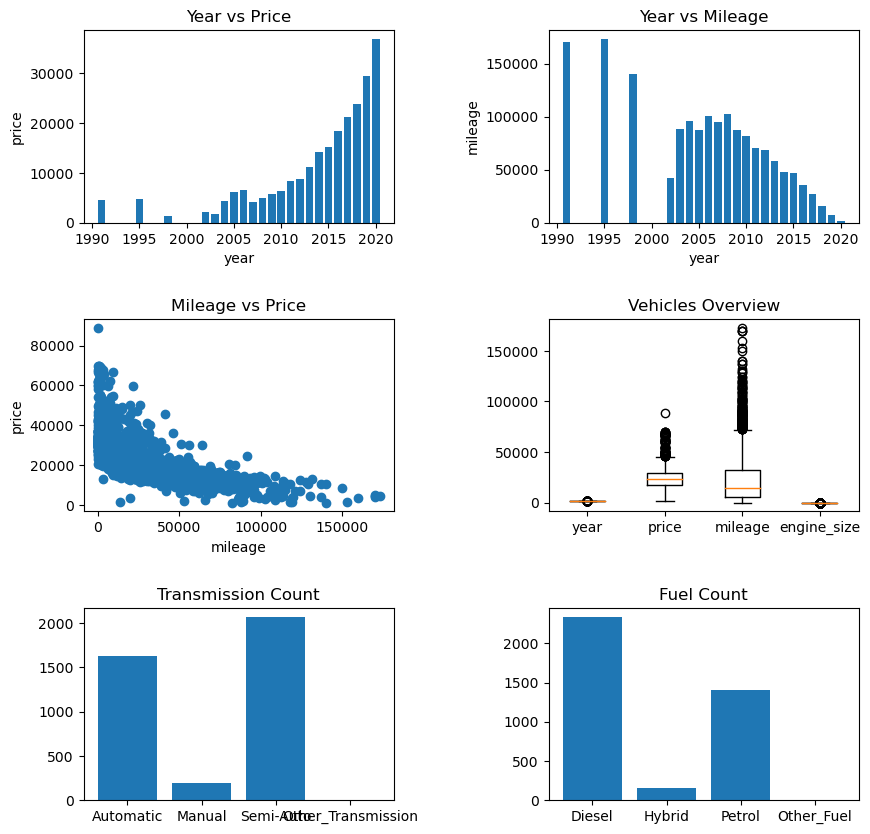

In [18]:
fig = plt.figure(figsize=(10,10))

year_price = fig.add_subplot(321)
year_mileage = fig.add_subplot(322)
mileage_price = fig.add_subplot(323)
vehicle_overview = fig.add_subplot(324)
transmission = fig.add_subplot(325)
fuel = fig.add_subplot(326)

year_price.bar(df1['year'], df1['price_mean'])
year_price.set_title('Year vs Price')
year_price.set_xlabel('year')
year_price.set_ylabel('price')

year_mileage.bar(df2['year'], df2['mileage_mean'])
year_mileage.set_title('Year vs Mileage')
year_mileage.set_xlabel('year')
year_mileage.set_ylabel('mileage')

mileage_price.scatter(df['mileage'], df['price'])
mileage_price.set_title('Mileage vs Price')
mileage_price.set_xlabel('mileage')
mileage_price.set_ylabel('price')

#vehicle_overview.boxplot(df['year'], df['price'], df['mileage'], df['engine_size'])
data = [df['year'], df['price'], df['mileage'], df['engine_size']]
vehicle_overview.boxplot(data)
vehicle_overview.set_title('Vehicles Overview')
vehicle_overview.set_xticklabels(['year', 'price','mileage', 'engine_size'])

automatic = df['Automatic'].sum()
manual = df['Manual'].sum()
semi_auto = df['Semi-Auto'].sum()
other_transmission = df['Other_Transmission'].sum()

transmission_data = [automatic, manual, semi_auto, other_transmission]
transmission_width = ['Automatic','Manual','Semi-Auto','Other_Transmission']
transmission.bar(transmission_width, transmission_data)
transmission.set_title('Transmission Count')

diesel = df['Diesel'].sum()
hybrid = df['Hybrid'].sum()
petrol = df['Petrol'].sum()
other_fuel = df['Other_Fuel'].sum()

fuel_data = [diesel, hybrid, petrol,other_fuel]
fuel_width = ['Diesel','Hybrid','Petrol','Other_Fuel']
fuel.bar(fuel_width, fuel_data)
fuel.set_title('Fuel Count')

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

# 5. Feature Observation and Hypothesis

In [19]:
df.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other_Transmission,Semi-Auto,Diesel,Hybrid,Other_Fuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


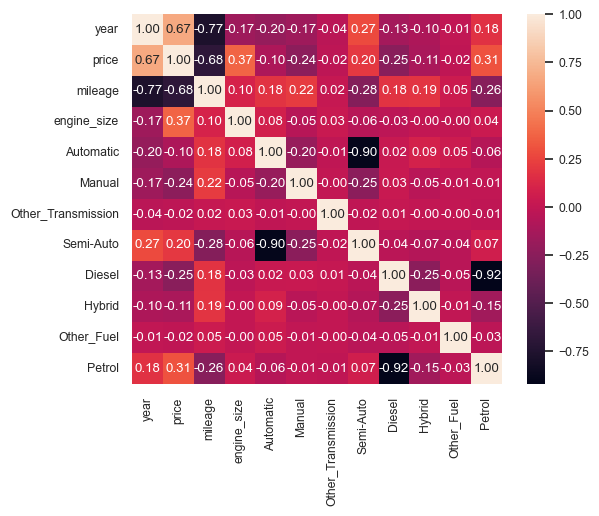

In [20]:
# Calculate and show correlation matrix
#df.values.T = convert Dataframe to NP 2d array
import seaborn as sns 
df.corr()
cm = np.corrcoef(df.values.T)
sns.set(font_scale = .8)
hm = sns.heatmap(cm,
                cbar = True,
                annot= True,
                square = True,
                fmt = '.2f',
                yticklabels = df.columns,
                xticklabels = df.columns)

## 5.1 Assuming price outside +-3SD as outliers 
### (For reference only, did not use in this submission)

In [21]:
#Remove data which price outside +-3SD
outlier_upper = df.loc[df.price > df.price.mean() + 3*df.price.std()].index
outlier_lower = df.loc[df.price < df.price.mean() - 3*df.price.std()].index

outlier_index = outlier_upper.join(outlier_lower)

# To save as a copy only
df2 = df.drop(outlier_index, axis = 0)


In [22]:
# Summary of outliers
print("There are {} number of records where price exceed 3 standard deviations,\
\nconsist of {}% of the total number of records".format(len(outlier_index), round(100*len(outlier_index)/len(df),3)))

There are 46 number of records where price exceed 3 standard deviations,
consist of 1.18% of the total number of records


# 6. A Simple Linear Regression Model

In [23]:
# Initialize some lists for storing results:
method_list = []
r2_list_train = []
r2_list_test = []
rmse_list = []


In [24]:
from sklearn.model_selection import train_test_split
response = df.price
features = df.drop('price', axis = 1)

features.head()

,year,mileage,engine_size,Automatic,Manual,Other_Transmission,Semi-Auto,Diesel,Hybrid,Other_Fuel,Petrol
0,2020.0,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020.0,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020.0,500.0,2.0,1,0,0,0,1,0,0,0
3,2019.0,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019.0,4500.0,2.0,1,0,0,0,1,0,0,0


In [25]:
#Spliting data
X_train, X_test, Y_train, Y_test = train_test_split(features, response, train_size = 0.75, random_state = 42)
print('Train size = {}, Test size = {}.'.format(len(X_train),len(X_test)))

Train size = 2923, Test size = 975.


## 6.1 Training and Testing

In [26]:
#build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

# Predict
y_pred = model.predict(X_test)
y_true = Y_test

## 6.2 Calculate the performance metric

In [27]:
# RMSE
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_true, y_pred)**.5

# R-Squared
r2_train = model.score(X_train, Y_train)
r2_test = model.score(X_test, Y_test)

print("The R-Squared of training data is: ", r2_train)
print("The R-Squared of testing data is: ", r2_test)
print("The RMSE is: ", RMSE)


method_list.append('Simple Linear Regression')
r2_list_train.append(r2_train)
r2_list_test.append(r2_test)
rmse_list.append(RMSE)

The R-Squared of training data is:  0.7698918676761602
The R-Squared of testing data is:  0.7569212366862703
The RMSE is:  4635.395585095545


## 6.3 Visualize the Actual vs Predicted for Simple Linear Regression

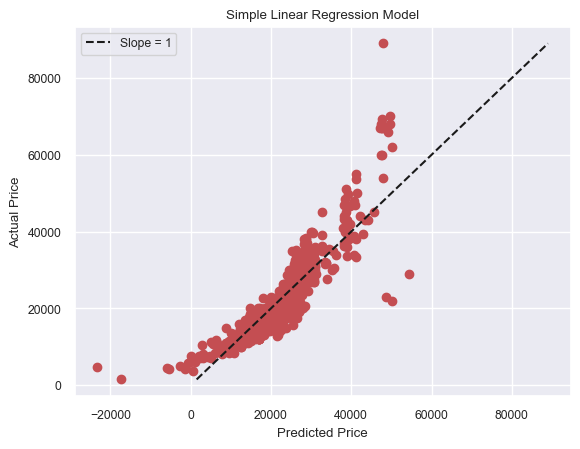

In [28]:
# plot the prediction vs actual
plt.scatter(y_pred, y_true, color = 'r')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Simple Linear Regression Model")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', label = "Slope = 1")
plt.legend()
plt.show()

# 7. Linear Regression with Lasso

In [29]:
from sklearn.model_selection import train_test_split
response = df.price
features = df.drop('price', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.25, random_state=42 )

print('The training size is: {}, the testing size is {}'.format(len(X_train), len(X_test)))

The training size is: 2923, the testing size is 975


## 7.1 Training and Testing

In [30]:
# Find the best alpha
from sklearn.linear_model import Lasso, LassoCV

model_lasso_cv = LassoCV(alphas = np.arange(1,1001,0.5), max_iter=4000).fit(X_train, Y_train)

In [31]:
# Best alpha
model_lasso_cv.alpha_
model_lasso_best = Lasso(alpha = model_lasso_cv.alpha_)

print('The best alpha is :', model_lasso_cv.alpha_)


The best alpha is : 4.0


In [32]:
# Train the model
model_lasso_best.fit(X_train, Y_train)

# Predict
y_pred = model_lasso_best.predict(X_test)
y_true = Y_test


## 7.2 Metrics for Linear Regression with Lasso

In [33]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_true, y_pred)**.5
r2_train = model_lasso_best.score(X_train, Y_train)
r2_test = model_lasso_best.score(X_test, Y_test)


print('RMSE is ', RMSE)
print('R-Squared for training data set is ', r2_train)
print('R-Squared for testing data set is ', r2_test)

method_list.append('Linear Regression with Lasso')
r2_list_train.append(r2_train)
r2_list_test.append(r2_test)
rmse_list.append(RMSE)

RMSE is  4636.039669014831
R-Squared for training data set is  0.7696833000563319
R-Squared for testing data set is  0.7568536808555559


## 7.3 Visualize the Actual vs Predicted for Linear Regression Model with Lasso

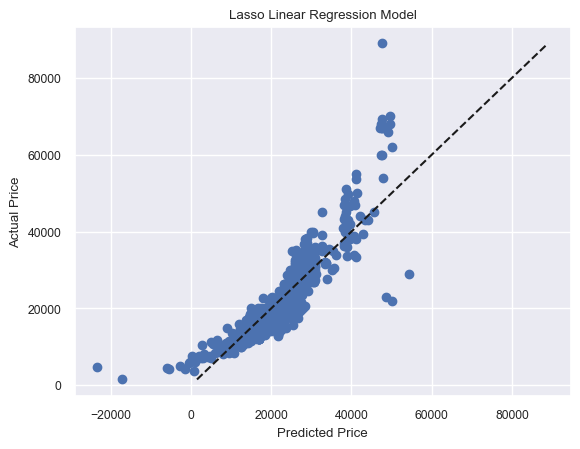

In [34]:
plt.scatter(y_pred, Y_test)
# plt.plot(X_test, y_pred, 'k--')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', label = "Slope = 1")
plt.title('Lasso Linear Regression Model')

plt.show()

# 8. Polynomial Regression

In [35]:
from sklearn.model_selection import train_test_split
response = df.price
features = df.drop('price', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.25, random_state=42 )

print('The training size is: {}, the testing size is {}'.format(len(X_train), len(X_test)))

The training size is: 2923, the testing size is 975


## 8.1 Define the function to find the best Polynomial Degree

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def PolyRegression (deg):
    # Split the training and testing dataset
    X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.25, random_state=42 )
    
    # Initialize the model and transform the X_train and X_test
    poly = PolynomialFeatures(degree=deg)
    X_train = poly.fit_transform(X_train)
    X_test = poly.fit_transform(X_test)
    
    # Train the model 
    model_poly = LinearRegression()
    model_poly.fit(X_train, Y_train)
    
    # Predict
    y_pred = model_poly.predict(X_test)
    y_true = Y_test
    
    # Compute the metrics
    RMSE = mean_squared_error(y_true, y_pred)**.5
    R_squared_train = model_poly.score(X_train, Y_train)
    R_squared_test = model_poly.score(X_test, Y_test)
    
    # Return the metrics
    print('The polynomial degree is :', deg)
    print('RMSE is ', RMSE)
    print('R-Squared for training data set is ', R_squared_train)
    print('R-Squared for testing data set is ', R_squared_test)
    print()
    
    # Return the best RMSE
    return RMSE

## 8.2 Get the best Polynomial Degree with the lowest RMSE

In [37]:
RMSE_list = []
max_deg = 7
for i in range(1,max_deg):
    RMSE_list.append(PolyRegression(i)) 
    
Best_RMSE = min(RMSE_list)
Best_poly_deg = RMSE_list.index(min(RMSE_list))+1
print("The best polynomial degree is : {}, and the RMSE is : {}".format(Best_poly_deg, Best_RMSE))



The polynomial degree is : 1
RMSE is  4635.3955850953425
R-Squared for training data set is  0.7698918676761604
R-Squared for testing data set is  0.7569212366862916

The polynomial degree is : 2
RMSE is  3440.4002743116366
R-Squared for training data set is  0.8696813766529402
R-Squared for testing data set is  0.8660966754445121

The polynomial degree is : 3
RMSE is  3019.4724770876664
R-Squared for training data set is  0.8962519869631485
R-Squared for testing data set is  0.8968579964972593

The polynomial degree is : 4
RMSE is  3102.55128901571
R-Squared for training data set is  0.9014769048763425
R-Squared for testing data set is  0.8911041443085265

The polynomial degree is : 5
RMSE is  6722.04295434649
R-Squared for training data set is  0.6333341196385615
R-Squared for testing data set is  0.4888174981236961

The polynomial degree is : 6
RMSE is  6856.5374723391205
R-Squared for training data set is  0.8814474880836036
R-Squared for testing data set is  0.468157400735417

The

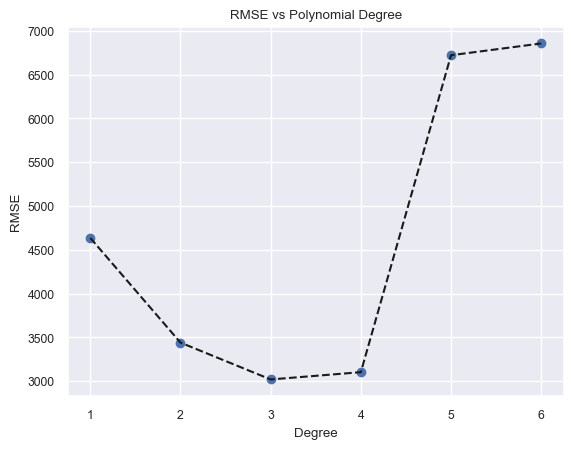

In [38]:
plt.scatter(range(1,max_deg), RMSE_list)
plt.plot(range(1,max_deg), RMSE_list, 'k--')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.show()

## 8.3 Build the model using the best Polynomial Degree

In [39]:
# Split the training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.25, random_state=42 )

# Initialize the model and transform the X_train and X_test
poly = PolynomialFeatures(degree=Best_poly_deg)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

# Train the model 
model_poly = LinearRegression()
model_poly.fit(X_train, Y_train)

# Predict
y_pred = model_poly.predict(X_test)
y_true = Y_test


#Metrics

RMSE = mean_squared_error(y_true, y_pred)**.5
r2_train = model_poly.score(X_train, Y_train)
r2_test = model_poly.score(X_test, Y_test)

method_list.append('Simple Polynomial Regression')
r2_list_train.append(r2_train)
r2_list_test.append(r2_test)
rmse_list.append(Best_RMSE)

## 8.4 Visualize the result

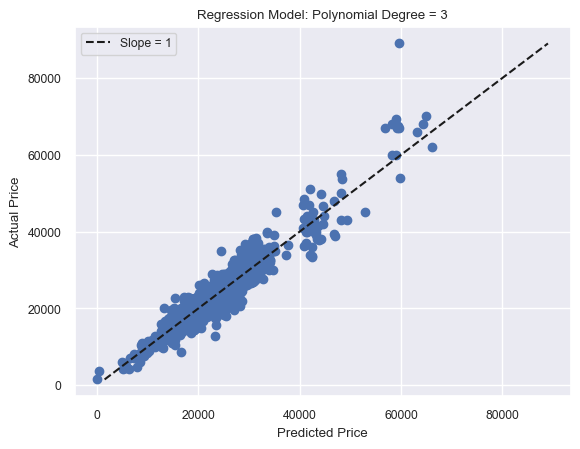

In [40]:
# Plot
plt.scatter(y_pred, y_true)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', label = "Slope = 1")
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Regression Model: Polynomial Degree = {}'.format(Best_poly_deg))
plt.legend()
plt.show()

# 9. Conclusions 

In [41]:
results = np.vstack((method_list, r2_list_train,r2_list_test, rmse_list)).T
results_df = pd.DataFrame(results, columns = ['Method', 'R2_Train','R2_Test', 'RMSE'])
results_df

,Method,R2_Train,R2_Test,RMSE
0,Simple Linear Regression,0.7698918676761602,0.7569212366862703,4635.395585095545
1,Linear Regression with Lasso,0.7696833000563319,0.7568536808555559,4636.039669014831
2,Simple Polynomial Regression,0.8962519869631485,0.8968579964972593,3019.4724770876664


In [42]:
print('It can be concluded that Simple Polynomial Regression with degree of {} has the best performance.'.format(Best_poly_deg))
print('The RMSE is: {} '.format(min(results_df.RMSE)) )
print('The R-Squared for training data set is: ', (min(results_df.R2_Train)))
print('The R-Squared for testing data set is : ', min(results_df.R2_Test))

It can be concluded that Simple Polynomial Regression with degree of 3 has the best performance.
The RMSE is: 3019.4724770876664 
The R-Squared for training data set is:  0.7696833000563319
The R-Squared for testing data set is :  0.7568536808555559


# Part B

In [43]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
#import file
df= pd.read_csv('competition_data.csv')

In [45]:
df.shape

(3897, 13)

In [46]:
df.describe()

,Unnamed: 0,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,2034.650244,2017.341288,23662.959969,22378.806518,246.505733,0.417501,0.051065,0.000257,0.531178,0.600205,0.038748,0.001540,0.359507
std,1132.652845,2.204979,8894.733784,22589.428526,703.211619,0.493210,0.220158,0.016019,0.499091,0.489919,0.193018,0.039213,0.479918
min,0.000000,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1058.000000,2016.000000,17690.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2032.000000,2018.000000,22980.000000,14640.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3009.000000,2019.000000,28900.000000,32442.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,4005.000000,2020.000000,69995.000000,173000.000000,6208.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Features modification

1. Looking into data, it seems that the engine_size are in different unit with some over 2000, but majority 2.000. Therefire dividing those over 1000 by 1000 to align the unit is reasonable.

In [47]:
#looking into data, it seems that the engine_size are in different unit, and therefore need modifying
df['engine_size'] =  df['engine_size'].apply(lambda x: round(x/1000,3) if x>1000 else round(x,3))

2. Feature engineering by standard scaling of numerical features (i.e. 'year', 'mileage', 'engine_size')

In [48]:
from sklearn.preprocessing import StandardScaler

#build a standard scaler
ss = StandardScaler()

#split the dependent variables in two categories (numeric variables and categorical variables)
label_cat = ['Automatic', 'Manual', 'Other', 
          'Semi-Auto', 'fuel_type_Diesel', 'fuel_type_Hybrid', 'fuel_type_Other', 'fuel_type_Petrol']
label_numeric = [ 'year','mileage', 'engine_size']
 
# standardization 
df_s = ss.fit_transform(df[label_numeric])
df_s = pd.DataFrame(df_s, columns=df[label_numeric].columns)
df = pd.concat([df.price, df_s, df[label_cat]], axis = 1)

pd.DataFrame(df, columns=df.columns)

df

,price,year,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,30495,1.205931,-0.937674,-0.081346,1,0,0,0,1,0,0,0
1,29989,1.205931,-0.946529,-1.107383,1,0,0,0,0,0,0,1
2,37899,1.205931,-0.968666,-0.081346,1,0,0,0,1,0,0,0
3,30399,0.752354,-0.769432,-0.081346,1,0,0,0,1,0,0,0
4,29899,0.752354,-0.791569,-0.081346,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3892,14700,-0.154801,0.397502,-0.906280,0,1,0,0,1,0,0,0
3893,18500,0.298777,0.259854,0.212100,1,0,0,0,1,0,0,0
3894,11900,-1.515532,1.136792,0.212100,0,1,0,0,1,0,0,0
3895,11300,-1.515532,1.216929,0.212100,1,0,0,0,1,0,0,0


In [49]:
df.describe()

,price,year,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
count,3897.000000,3.897000e+03,3.897000e+03,3.897000e+03,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,23662.959969,-2.795073e-14,-4.427217e-17,5.938568e-17,0.417501,0.051065,0.000257,0.531178,0.600205,0.038748,0.001540,0.359507
std,8894.733784,1.000128e+00,1.000128e+00,1.000128e+00,0.493210,0.220158,0.016019,0.499091,0.489919,0.193018,0.039213,0.479918
min,1290.000000,-1.194781e+01,-9.907589e-01,-4.185492e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17690.000000,-6.083778e-01,-7.251582e-01,-8.134624e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22980.000000,2.987767e-01,-3.426293e-01,-8.134624e-02,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,28900.000000,7.523540e-01,4.455396e-01,1.238611e-01,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,69995.000000,1.205931e+00,6.668629e+00,8.553777e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Import seaborn
import seaborn as sns

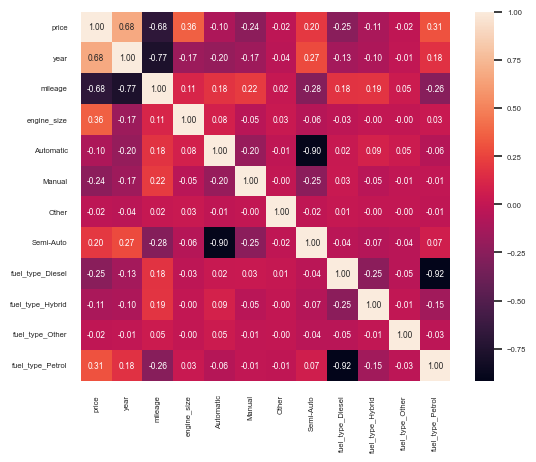

In [51]:
#see correlation
# Calculate and show correlation matrix
cm = np.corrcoef(df.values.T)
sns.set(font_scale=0.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                yticklabels=df.columns,
                xticklabels=df.columns)

# Appying Model

## 1. Linear regression with all features

In [52]:
# first let divide the df into features and response
from sklearn.model_selection import train_test_split
label_all = ['year', 'mileage', 'engine_size', 'Automatic', 'Manual', 'Other', 
          'Semi-Auto', 'fuel_type_Diesel', 'fuel_type_Hybrid', 'fuel_type_Other', 'fuel_type_Petrol']
y = df['price']
x = df[label_all]

In [53]:
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [54]:
# build the model
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

# get the predictions for the test dataset
predictions1 = model1.predict(x_test)

In [55]:
#Evaluation function
from sklearn.metrics import mean_squared_error

def evaluation(model,prediction):
    # R-squared
    r2_train = model.score(x_train, y_train)
    r2_test = model.score(x_test, y_test)
    # RMSE  
    mse = mean_squared_error(y_test, prediction)
    print("R^2 in Training Set:", r2_train)
    print("R^2 in Testing Set:", r2_test)
    print('RMSE is :', mse**0.5)

In [56]:
evaluation(model1, predictions1)

R^2 in Training Set: 0.7721601087924325
R^2 in Testing Set: 0.7420042556892951
RMSE is : 5005.9324977505385


**The result of linear regression with all features is: <br>**
R^2 in Testing Set: 0.7420042556892951<br>
RMSE: 5005.9324977505385

## 2. Linear regression with filtered features

In [57]:
#only include features with correlation > |0.2|

# first let divide the df into features and response
label_fil = ['year', 'mileage', 'engine_size', 'fuel_type_Petrol', 'Manual', 'fuel_type_Diesel' ]
y = df['price']
x = df[label_fil]
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# build the model
modelf = LinearRegression()
modelf.fit(x_train, y_train)
# get the predictions for the test dataset
predictionsf = modelf.predict(x_test)
#evalutaion
evaluation(modelf, predictionsf)

R^2 in Training Set: 0.7717092543099449
R^2 in Testing Set: 0.7433479380196766
RMSE is : 4992.879639150038


**The result of linear regression with all features is: <br>**
R^2 in Testing Set: 0.7433479380196766 <br>
RMSE is : 4992.879639150038

**Conclusion: <br>**
With linear regression, filtered features (only features with correlation > |0.2|) performs better

## 3. Linear Lasso with filtered features

In [58]:
#import libraries
from sklearn.linear_model import Lasso, LassoCV

In [59]:
y = df['price']
x = df[label_fil]
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [60]:
# Lasso with different alpha
lasso_cv_model = LassoCV(alphas = [0.00001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10]).fit(x_train,y_train)
print(lasso_cv_model.alpha_)

1e-05


In [61]:
predictions_l = lasso_cv_model.predict(x_test)

In [62]:
#Evaluation

# R-squared
r2_train = lasso_cv_model.score(x_train, y_train)
r2_test = lasso_cv_model.score(x_test, y_test)
# RMSE
mse = mean_squared_error(y_test, predictions_l)
    
print("R^2 in Training Set:", r2_train)
print("R^2 in Testing Set:", r2_test)
print('RMSE is :', mse**0.5)
print('\n')

R^2 in Training Set: 0.7717092543099449
R^2 in Testing Set: 0.7433479378633919
RMSE is : 4992.8796406702095




**The result of linear lasso regression with filtered features is: <br>**
R^2 in Testing Set: 0.7433479378633919 <br>
RMSE: 4992.8796406702095

## 4. Linear Ridge with filtered features

In [63]:
#import libraries
from sklearn.linear_model import Ridge, RidgeCV

In [64]:
y = df['price']
x = df[label_fil]
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [65]:
# Ridge with different alpha
ridge_cv_model = RidgeCV(alphas = [0.01,1,2,3,4,5,6,7,8,9,10]).fit(x_train,y_train)
print(ridge_cv_model.alpha_)

10.0


/Users/bill/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


In [66]:
predictions_r = ridge_cv_model.predict(x_test)

In [67]:
#Evaluation
evaluation(ridge_cv_model,predictions_r)

R^2 in Training Set: 0.7716863166604969
R^2 in Testing Set: 0.7431877729096283
RMSE is : 4994.437312966584


**The result of linear ridge regression with filtered features is: <br>**
R^2 in Testing Set: 0.7431877729096283 <br>
RMSE: 4994.437312966584

## Polynomial 

In [68]:
from sklearn.preprocessing import PolynomialFeatures

## 5. Polynomial regression with filtered features

In [69]:
# a function to run polynomial regression with parameter of degree
def create_model_p(deg):
    
    print("Model with polynomial degree:", deg)
    
    #transform the polynomial features
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x)
    
    #split to train and test data
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.1, random_state=42)
    
    #fit in a linear regression
    poly.fit(x_train, y_train)
    lin = LinearRegression()
    lin.fit(x_train, y_train)
    
    #prediction
    predictions_p = lin.predict(x_test)
    
    #Evaluation
    # R-squared
    r2_train = lin.score(x_train, y_train)
    r2_test = lin.score(x_test, y_test)
    # RMSE
    mse = mean_squared_error(y_test, predictions_p)
    
    print("R^2 in Training Set:", r2_train)
    print("R^2 in Testing Set:", r2_test)
    print('RMSE is :', mse**0.5)
    print('\n')
    

In [70]:
#a loop to run from polynomial degree= 2 to 6
y = df['price']
x = df[label_fil]
for i in range(2,7):
    create_model_p(i)

Model with polynomial degree: 2
R^2 in Training Set: 0.8695914984441271
R^2 in Testing Set: 0.8767475252762398
RMSE is : 3460.003530777025


Model with polynomial degree: 3
R^2 in Training Set: 0.8964382162328042
R^2 in Testing Set: 0.915195895140464
RMSE is : 2870.0347499977047


Model with polynomial degree: 4
R^2 in Training Set: 0.9076282042997348
R^2 in Testing Set: 0.9143848235441728
RMSE is : 2883.726683389186


Model with polynomial degree: 5
R^2 in Training Set: 0.9120805306008778
R^2 in Testing Set: 0.91552439861046
RMSE is : 2864.4705665804713


Model with polynomial degree: 6
R^2 in Training Set: 0.9155564106545824
R^2 in Testing Set: -5119618.925879805
RMSE is : 22299625.949107043




**The best result of polynomial regression with filtered features is: <br>**
Model with polynomial degree: 5 <br>
R^2 in Testing Set: 0.91552439861046 <br>
RMSE: 2864.4705665804713

## 6. Polynomial regression with all features 

In [71]:
#a loop to run from polynomial degree= 2 to 6
y = df['price']
x = df[label_all]
for i in range(2,7):
    create_model_p(i)

Model with polynomial degree: 2
R^2 in Training Set: 0.8705483427746055
R^2 in Testing Set: 0.8763648355535458
RMSE is : 3465.3708938798645


Model with polynomial degree: 3
R^2 in Training Set: 0.8984072691520824
R^2 in Testing Set: 0.9121160830439032
RMSE is : 2921.6851991363774


Model with polynomial degree: 4
R^2 in Training Set: 0.9106214308150556
R^2 in Testing Set: 0.9225976266690967
RMSE is : 2741.9268011884183


Model with polynomial degree: 5
R^2 in Training Set: 0.9143906501255639
R^2 in Testing Set: -104786891.24088767
RMSE is : 100886300.81503783


Model with polynomial degree: 6
R^2 in Training Set: 0.9200044602225984
R^2 in Testing Set: -6160583.301015512
RMSE is : 24461870.931413975




**The best result of polynomial regression with all features is: <br>**
Model with polynomial degree: 4 <br>
R^2 in Testing Set: 0.9225976266690967 <br>
RMSE: 2741.9268011884183

## Polynomial Lasso

In [72]:
# a function to run polynomial regression with parameter of degree
def create_model_pl(deg):
    
    print("Lasso Model with polynomial degree:", deg)
    
    #transform the polynomial features
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x)
    
    #split to train and test data
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.1, random_state=42)
    
    #fit in a linear regression
    poly.fit(x_train, y_train)
    las = LassoCV(alphas = [0.00001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,25,100]).fit(x_train,y_train)
    las.fit(x_train, y_train)
    
    #prediction
    predictions_p_l = las.predict(x_test)
    
    print('alpha:', las.alpha_)
    
    #Evaluation
    # R-squared
    r2_train = las.score(x_train, y_train)
    r2_test = las.score(x_test, y_test)
    # RMSE
    mse = mean_squared_error(y_test, predictions_p_l)
    
    print("R^2 in Training Set:", r2_train)
    print("R^2 in Testing Set:", r2_test)
    print('RMSE is :', mse**0.5)
    print('\n')
    

## 7. Polynomial Lasso with filtered features 

In [73]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
#a loop to run from polynomial degree= 2 to 6
y = df['price']
x = df[label_fil]

for i in range(2,7):
    create_model_pl(i)

Lasso Model with polynomial degree: 2
alpha: 0.1
R^2 in Training Set: 0.8695905159270219
R^2 in Testing Set: 0.8767440672733753
RMSE is : 3460.052067807325


Lasso Model with polynomial degree: 3
alpha: 0.1
R^2 in Training Set: 0.8957696655579523
R^2 in Testing Set: 0.9165411504152617
RMSE is : 2847.1799387610777


Lasso Model with polynomial degree: 4
alpha: 25.0
R^2 in Training Set: 0.8994195483246616
R^2 in Testing Set: 0.9226838139938304
RMSE is : 2740.399812109676


Lasso Model with polynomial degree: 5
alpha: 100.0
R^2 in Training Set: 0.8925502273475974
R^2 in Testing Set: 0.9205316384390132
RMSE is : 2778.278943862716


Lasso Model with polynomial degree: 6
alpha: 100.0
R^2 in Training Set: 0.8928317822173784
R^2 in Testing Set: 0.9187382038064186
RMSE is : 2809.454007297167




**The best result of polynomial lasso regression with filtered features is: <br>**
Model with polynomial degree: 4 <br>
R^2 in Testing Set: 0.9226838139938304 <br>
RMSE is : 2740.399812109676

## 8. Polynomial Lasso with all features 

In [74]:
#a loop to run from polynomial degree= 2 to 5
y = df['price']
x = df[label_all]

for i in range(2,6):
    create_model_pl(i)

Lasso Model with polynomial degree: 2
alpha: 3.0
R^2 in Training Set: 0.8702387024970384
R^2 in Testing Set: 0.8763579663902179
RMSE is : 3465.467160456358


Lasso Model with polynomial degree: 3
alpha: 25.0
R^2 in Training Set: 0.8932074836124931
R^2 in Testing Set: 0.9143775323138839
RMSE is : 2883.849473930373


Lasso Model with polynomial degree: 4
alpha: 10.0
R^2 in Training Set: 0.904585186194844
R^2 in Testing Set: 0.9251489373159147
RMSE is : 2696.358928371455


Lasso Model with polynomial degree: 5
alpha: 25.0
R^2 in Training Set: 0.9022357588023862
R^2 in Testing Set: 0.926991832978987
RMSE is : 2662.95875798723




**The best result of polynomial lasso regression with all features is: <br>**
Lasso Model with polynomial degree: 5 <br>
R^2 in Testing Set: 0.926991832978987 <br>
RMSE is : 2662.95875798723

## Polynomial Ridge 

In [75]:
# a function to run polynomial regression with parameter of degree
def create_model_pr(deg):
    
    print("Ridge Model with polynomial degree:", deg)
    
    #transform the polynomial features
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x)
    
    #split to train and test data
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.1, random_state=42)
    
    #fit in a linear regression
    poly.fit(x_train, y_train)
    rid = RidgeCV(alphas = [0.00001, 0.01,1,2,3,4,5,6,7,8,9,10]).fit(x_train,y_train)
    rid.fit(x_train, y_train)
    
    #prediction
    predictions_p_r = rid.predict(x_test)
    
    print('alpha:', rid.alpha_)
    
    #Evaluation
    # R-squared
    r2_train = rid.score(x_train, y_train)
    r2_test = rid.score(x_test, y_test)
    # RMSE
    mse = mean_squared_error(y_test, predictions_p_r)
    
    print("R^2 in Training Set:", r2_train)
    print("R^2 in Testing Set:", r2_test)
    print('RMSE is :', mse**0.5)
    print('\n')

## 9. Polynomial Ridge with filtered features

In [76]:
y = df['price']
x = df[label_fil]
#a loop to run from polynomial degree= 2 to 6
for i in range(2,7):
    create_model_pr(i)

Ridge Model with polynomial degree: 2
alpha: 1.0
R^2 in Training Set: 0.8695704953119177
R^2 in Testing Set: 0.8767201329450808
RMSE is : 3460.387994851063


Ridge Model with polynomial degree: 3
alpha: 10.0
R^2 in Training Set: 0.8953182687345412
R^2 in Testing Set: 0.9161569789725144
RMSE is : 2853.725376355228


Ridge Model with polynomial degree: 4
alpha: 10.0
R^2 in Training Set: 0.9058725070201841
R^2 in Testing Set: 0.9188878545169135
RMSE is : 2806.8658874534913


Ridge Model with polynomial degree: 5
alpha: 2.0
R^2 in Training Set: 0.9111992302651037
R^2 in Testing Set: 0.9185245748428555
RMSE is : 2813.144467267393


Ridge Model with polynomial degree: 6
alpha: 10.0
R^2 in Training Set: 0.9115897059262834
R^2 in Testing Set: -0.7662408956563329
RMSE is : 13097.9607925704




**The best result of polynomial lasso regression with filtered features is: <br>**
Ridge Model with polynomial degree: 4<br>
R^2 in Testing Set: 0.9188878545169135<br>
RMSE is : 2806.8658874534913

## 10. Polynomial Ridge with all features

In [77]:
y = df['price']
x = df[label_all]
#a loop to run from polynomial degree= 2 to 6
for i in range(2,7):
    create_model_pr(i)

Ridge Model with polynomial degree: 2
alpha: 10.0
R^2 in Training Set: 0.8703609783366129
R^2 in Testing Set: 0.876190013127798
RMSE is : 3467.8200778882247


Ridge Model with polynomial degree: 3
alpha: 10.0
R^2 in Training Set: 0.8978976928445762
R^2 in Testing Set: 0.9142747989523188
RMSE is : 2885.579035945354


Ridge Model with polynomial degree: 4
alpha: 10.0
R^2 in Training Set: 0.9087620971853025
R^2 in Testing Set: 0.9211379879781467
RMSE is : 2767.6594101030996


Ridge Model with polynomial degree: 5
alpha: 10.0
R^2 in Training Set: 0.9133292550634748
R^2 in Testing Set: 0.8957602003591363
RMSE is : 3181.9657591960768


Ridge Model with polynomial degree: 6
alpha: 10.0
R^2 in Training Set: 0.9153761694027955
R^2 in Testing Set: -3.8621520433864402
RMSE is : 21731.66420213073




**The best result of polynomial lasso regression with all features is: <br>**
Ridge Model with polynomial degree: 4 <br>
R^2 in Testing Set: 0.9211379879781467 <br>
RMSE is : 2767.6594101030996

# Result: The best model

From the results above, the lasso polynomial model, including all features with the polynomial degree of 4 performs the best.<br><br>
The below with try to improve further by selecting the best alpha. <br>

In [78]:
#after rerun the for loop for alphas, the best alpha should be around 25.
alphas = np.linspace(24, 26, 100)
alphas

array([24.        , 24.02020202, 24.04040404, 24.06060606, 24.08080808,
       24.1010101 , 24.12121212, 24.14141414, 24.16161616, 24.18181818,
       24.2020202 , 24.22222222, 24.24242424, 24.26262626, 24.28282828,
       24.3030303 , 24.32323232, 24.34343434, 24.36363636, 24.38383838,
       24.4040404 , 24.42424242, 24.44444444, 24.46464646, 24.48484848,
       24.50505051, 24.52525253, 24.54545455, 24.56565657, 24.58585859,
       24.60606061, 24.62626263, 24.64646465, 24.66666667, 24.68686869,
       24.70707071, 24.72727273, 24.74747475, 24.76767677, 24.78787879,
       24.80808081, 24.82828283, 24.84848485, 24.86868687, 24.88888889,
       24.90909091, 24.92929293, 24.94949495, 24.96969697, 24.98989899,
       25.01010101, 25.03030303, 25.05050505, 25.07070707, 25.09090909,
       25.11111111, 25.13131313, 25.15151515, 25.17171717, 25.19191919,
       25.21212121, 25.23232323, 25.25252525, 25.27272727, 25.29292929,
       25.31313131, 25.33333333, 25.35353535, 25.37373737, 25.39

In [79]:
from sklearn.linear_model import Lasso

rmse_list = []
r2_list = []

for a in alphas:
    #transform the polynomial features
    poly = PolynomialFeatures(degree = 5)
    x_poly = poly.fit_transform(x)
    
    #split to train and test data
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.1, random_state=42)
    
    #fit in a linear regression
    poly.fit(x_train, y_train)
    
    las = Lasso(alpha = a)
    las.fit(x_train, y_train)
    
    #prediction
    predictions_p_l = las.predict(x_test)
    
    
    r2_list.append(las.score(x_test,y_test))
    rmse = mean_squared_error(y_test, predictions_p_l)**0.5;
    rmse_list.append(rmse)
    
lasso_result = np.vstack((alphas, rmse_list, r2_list)).T
lasso_df = pd.DataFrame(lasso_result, columns=['Alpha', 'RMSE', 'R2'])
pd.set_option('display.max_rows', None)
display(lasso_df)
pd.reset_option('all')


,Alpha,RMSE,R2
0,24.000000,2663.684853,0.926952
1,24.020202,2663.661858,0.926953
2,24.040404,2663.638555,0.926955
3,24.060606,2663.616223,0.926956
4,24.080808,2663.593369,0.926957
5,24.101010,2663.571913,0.926958
6,24.121212,2663.549410,0.926959
7,24.141414,2663.529285,0.926961
8,24.161616,2663.508801,0.926962
9,24.181818,2663.490327,0.926963


The best alpha is at 24.666667

In [80]:
#rerun with the best parameters
y = df['price']
x = df[label_all]


print("Lasso Model with polynomial degree 5")
    
#transform the polynomial features
poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(x)
    
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.1, random_state=42)
    
#fit in a linear regression
poly.fit(x_train, y_train)
las = Lasso(alpha = 24.666667)
las.fit(x_train, y_train)
    
#prediction
predictions_p_l = las.predict(x_test)
    
#Evaluation
# R-squared
r2_train = las.score(x_train, y_train)
r2_test = las.score(x_test, y_test)
# RMSE
mse = mean_squared_error(y_test, predictions_p_l)
    
print("R^2 in Training Set:", r2_train)
print("R^2 in Testing Set:", r2_test)
print('RMSE:', mse**0.5)    

Lasso Model with polynomial degree 5
R^2 in Training Set: 0.9022902614734005
R^2 in Testing Set: 0.9269964751633586
RMSE: 2662.8740952532785


**Conclusion: <br>**
The best model is the lasso polynomial regression model <br>
Polynomial degree = 5 <br>
All the predictors are used. <br>
Alpha applied = 24.666667<br>

**Result<br>**
R^2 in Testing Set: 0.9269964751633586 <br>
RMSE : 2662.8740952532785

# Member Contribution

|Student ID|Name| Tom Tsang | Feng Leung | King Lok Wan | Karli Li |
|--------------|------------|--------------|--------------|--------------||
|300363109|  Tom Tsang   |-----|  4  |  4  |  4  |
|300366142|  Feng Leung  |  4  |-----|  4  |  4  |
|300360889| King Lok Wan |  4  |  4  |-----|  4  |
|300350713|   Karli Li   |  4  |  4  |  4  |-----|